Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read Data

In [2]:
file = pd.ExcelFile("../../../data/v4/Handballprojekt_1Liga fertig.xlsx")

file.sheet_names

df = file.parse('1. Liga')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-2]


/Users/nayansavaliya/Desktop/HandballGameAnalysis/hba-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Cleanup & Renaming

In [3]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
#df.dropna(inplace=True)
df.replace('-', np.nan,inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','playTime',
              'homeGoals','opponentGoals','throwSuccess','whistleThrowTime',
              'LRHandy','throwDirection','goalKeeperPosition',
              'goalKeeperName', 'goalKeeperHeightCM','shooterheightCM',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','playTime':'float16',
              'homeGoals':'float16','opponentGoals':'float16','whistleThrowTime':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16','goalKeeperName':'string', 'goalKeeperHeightCM':'float16','shooterheightCM':'float16' })
df.head()

,homeTeam,opponentTeam,day,name,playTime,homeGoals,opponentGoals,throwSuccess,whistleThrowTime,LRHandy,throwDirection,goalKeeperPosition,goalKeeperName,goalKeeperHeightCM,shooterheightCM,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,SC Magdeburg,TVB 1898 Stuttgart,1.0,Magnusson,19.0,9.0,9.0,1.0,18.0,2.0,7.0,1.0,Heinevetter,194.0,186.0,0.0,1.0,NaN,NaN
1,SC Magdeburg,TVB 1898 Stuttgart,1.0,Magnusson,32.0,17.0,16.0,1.0,20.0,2.0,9.0,1.0,Heinevedtter,194.0,186.0,0.0,2.0,7.0,1.0
2,SC Magdeburg,TVB 1898 Stuttgart,1.0,Magnusson,40.0,22.0,18.0,1.0,44.0,2.0,8.0,1.0,Vujovic,196.0,186.0,1.0,3.0,9.0,1.0
3,SC Magdeburg,TVB 1898 Stuttgart,1.0,Magnusson,46.0,27.0,22.0,0.0,21.0,2.0,4.0,1.0,Vujovic,196.0,186.0,0.0,4.0,8.0,1.0
4,Rhein-Neckar Löwen,SC Magdeburg,2.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN


General Summary

In [4]:
ps = df.loc[:,('throwSuccess','pressureSituation')].copy()
ps.dropna(inplace=True)
ps['throwSuccess'].replace(2.0, 1.0,inplace=True)
s = [0, 1,4,5,7]
ps = ps[ps.pressureSituation.isin(s) == True]
ps['pressureSituation'].replace(4.0, 1.0,inplace=True)
ps['pressureSituation'].replace(5.0, 1.0,inplace=True)
ps['pressureSituation'].replace(7.0, 1.0,inplace=True)
# print(ps)
# X_ps = ['No Pressure Situation','GoalKeeperChange','LastThrowFailed',
#      'GoalDiffLessEqualTo4After50MinPlay','GoalKeeperChange-LastThrowFailed',
#      'GoalKeeperChange-GoalDiffLessEqualTo4After50MinPlay','LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay',
#      'GoalKeeperChange-LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay',
#      'FirstInNachWurf']
# for i,s in enumerate(X_ps):
#     ps['pressureSituation'].replace(i, s,inplace=True)

# print(ps)
# ps1 =pd.DataFrame(ps.groupby('throwSuccess').pressureSituation.value_counts()).unstack()
# ps1
contigency= pd.crosstab(ps['throwSuccess'], ps['pressureSituation'], margins=True, margins_name="Total") 
contigency



pressureSituation,0.0,1.0,Total
throwSuccess,,,
0.0,32,9,41
1.0,179,41,220
Total,211,50,261


throwSuccess,Failed,Success
pressureSituation,,
GoalKeeper Changed,0.180000,0.820000
Same GoalKeeper,0.151659,0.848341


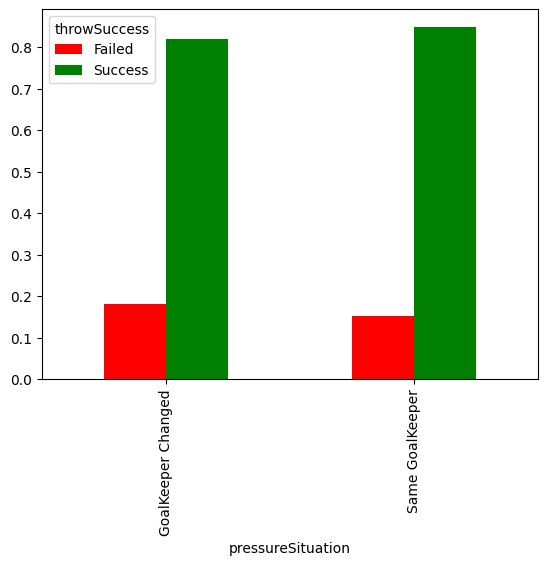

In [5]:
#contigency_pct = pd.crosstab(ps['throwSuccess'], ps['pressureSituation'], normalize='all', margins=True, margins_name="Total")
dfpct = ps.copy()
dfpct['pressureSituation'].replace(0.0,'Same GoalKeeper',inplace=True)
dfpct['pressureSituation'].replace(1.0,'GoalKeeper Changed',inplace=True)
dfpct['throwSuccess'].replace(0.0,'Failed',inplace=True)
dfpct['throwSuccess'].replace(1.0,'Success',inplace=True)
contigency_pct = pd.crosstab(dfpct['pressureSituation'],dfpct['throwSuccess'], normalize='index')
contigency_pct.plot(kind='bar',stacked=False,color={"Failed": "red", "Success": "green"})
contigency_pct

In [6]:
from scipy.stats import chi2_contingency


# null hypo : no significant association between pressure situation and throwsuccess
# research hypo : There is relation between pressure situation and throwsuccess
# for df=1 & alpha=0.05 c =1(Chi-square table)
contigencychi= pd.crosstab(ps['throwSuccess'], ps['pressureSituation']) 
c, p, dof, expected = chi2_contingency(contigencychi) 
print(c,p,dof)
print(expected)
#c > 3.84  Null Hypo accepted with 5% error

# Also,
# P-value ≤ α: The variables have a statistically significant association (Reject H0)
# If the p-value is less than or equal to the significance level, you reject the null hypothesis and conclude that there is a statistically significant association between the variables.
# P-value > α: Cannot conclude that the variables are associated (Fail to reject H0)
# If the p-value is larger than the significance level, you fail to reject the null hypothesis because there is not enough evidence to conclude that the variables are associated.

0.07787199850779197 0.7802021965546373 1
[[ 33.14559387   7.85440613]
 [177.85440613  42.14559387]]


Changing Goalkeeper increses the chances of Throw Success but as per Chi Square Test we can conclude that there is no statistically significant association between Throw Success and Pressure Situation with 5% error.